Mark Bakker (Technical Univeristy Delft) + Vincent Post (Edinsi Groundater & Flinders University). 
Lego block approach.
MODFLOW 6, irregular grid, linking models, Neton Solver, New Syntax - not backwards compatiable.|
Scripting many record keeping, and flexibility, benfits.

Abbreviations:
m = metres
    mBGL = metres below ground level
    d = day
    
Functions abbrevation
numpy = np
matplotlib = mpl
matplotlib.pyplot = plt
flopy = fp

Technical Background:
Flopy, number system considerations, i.e., starting from '0', and are counted like an Spreadsheet. This differs from Groundwater Vistas approach. 
Consisent units needed, metres per day preferrable. Water in and out, positive and negetative, respectively.

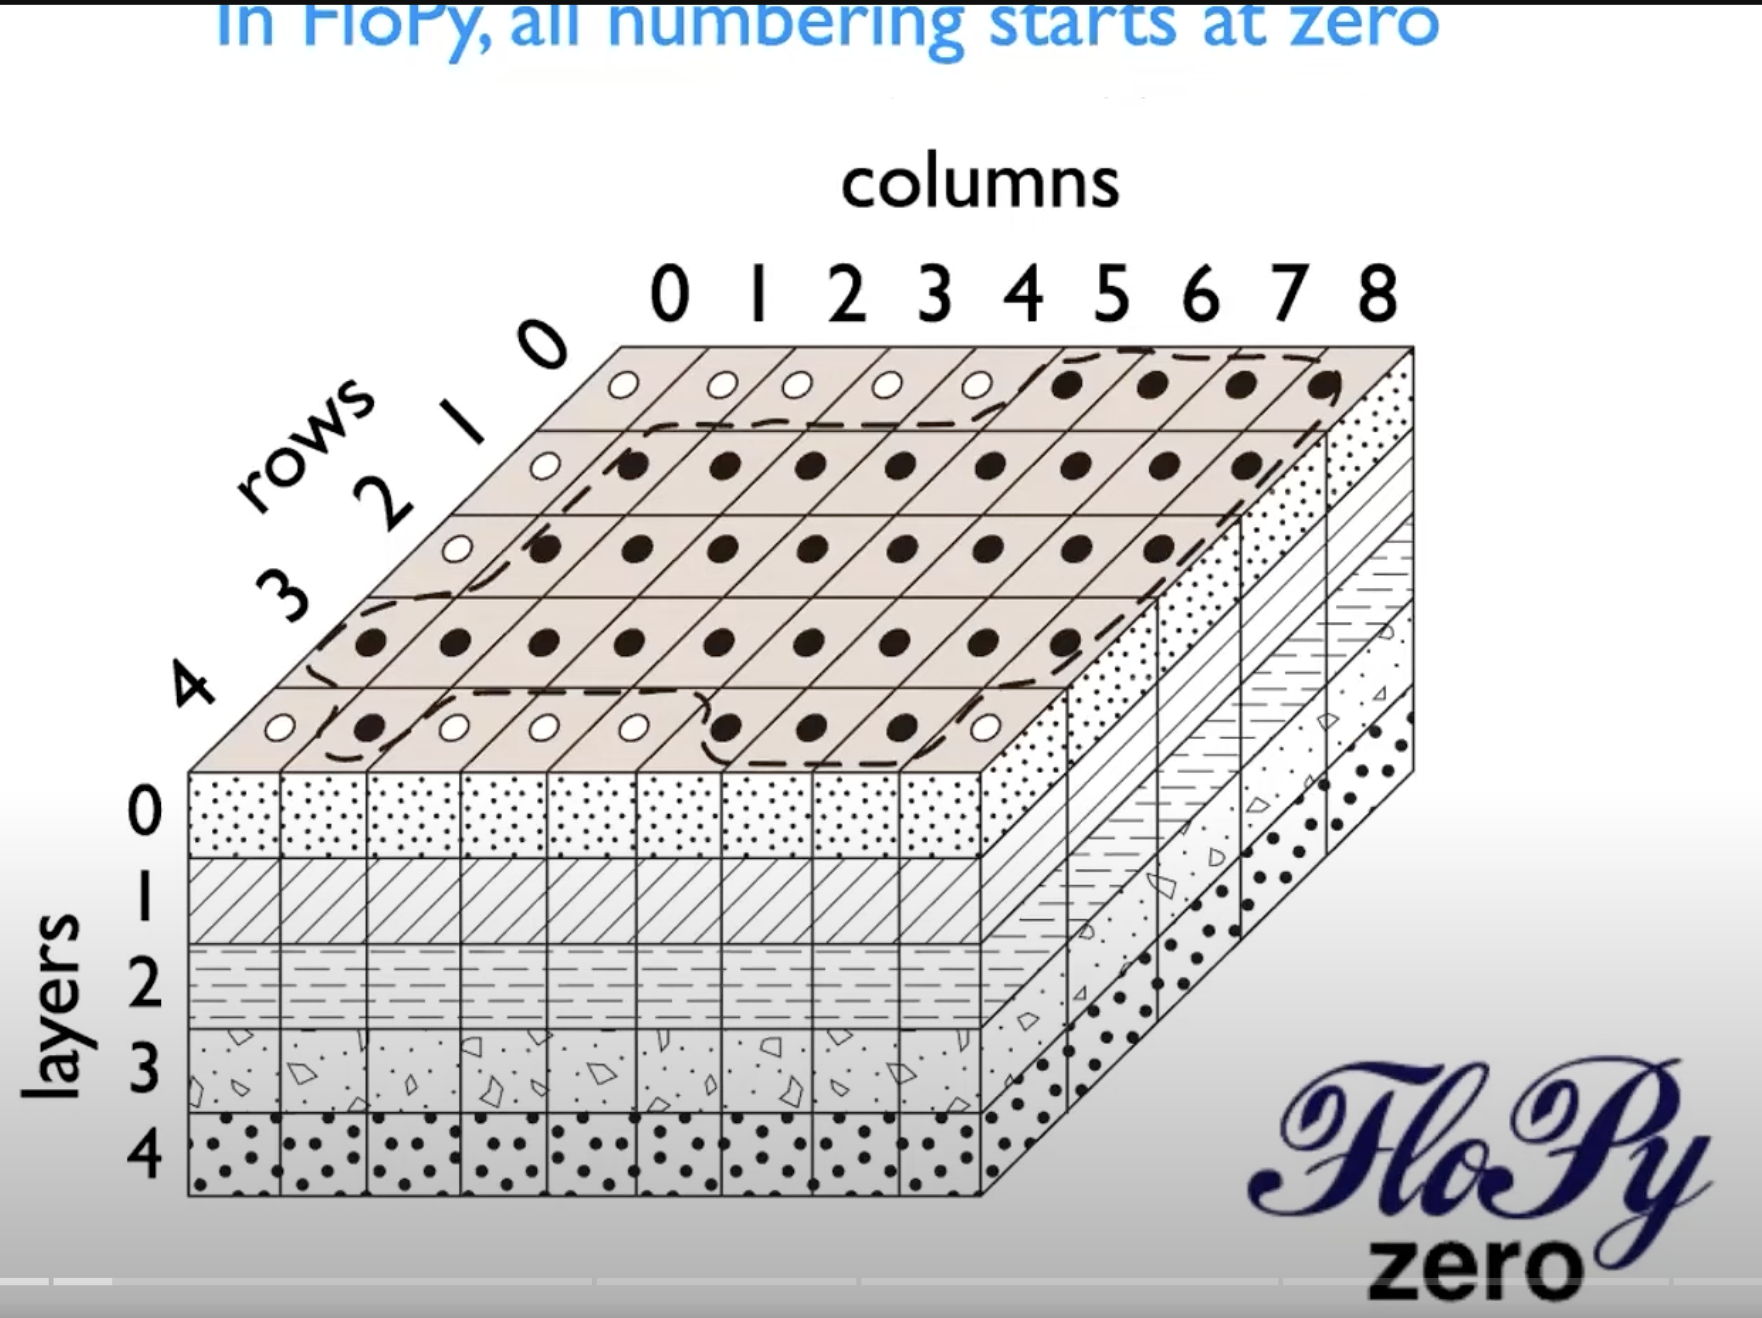

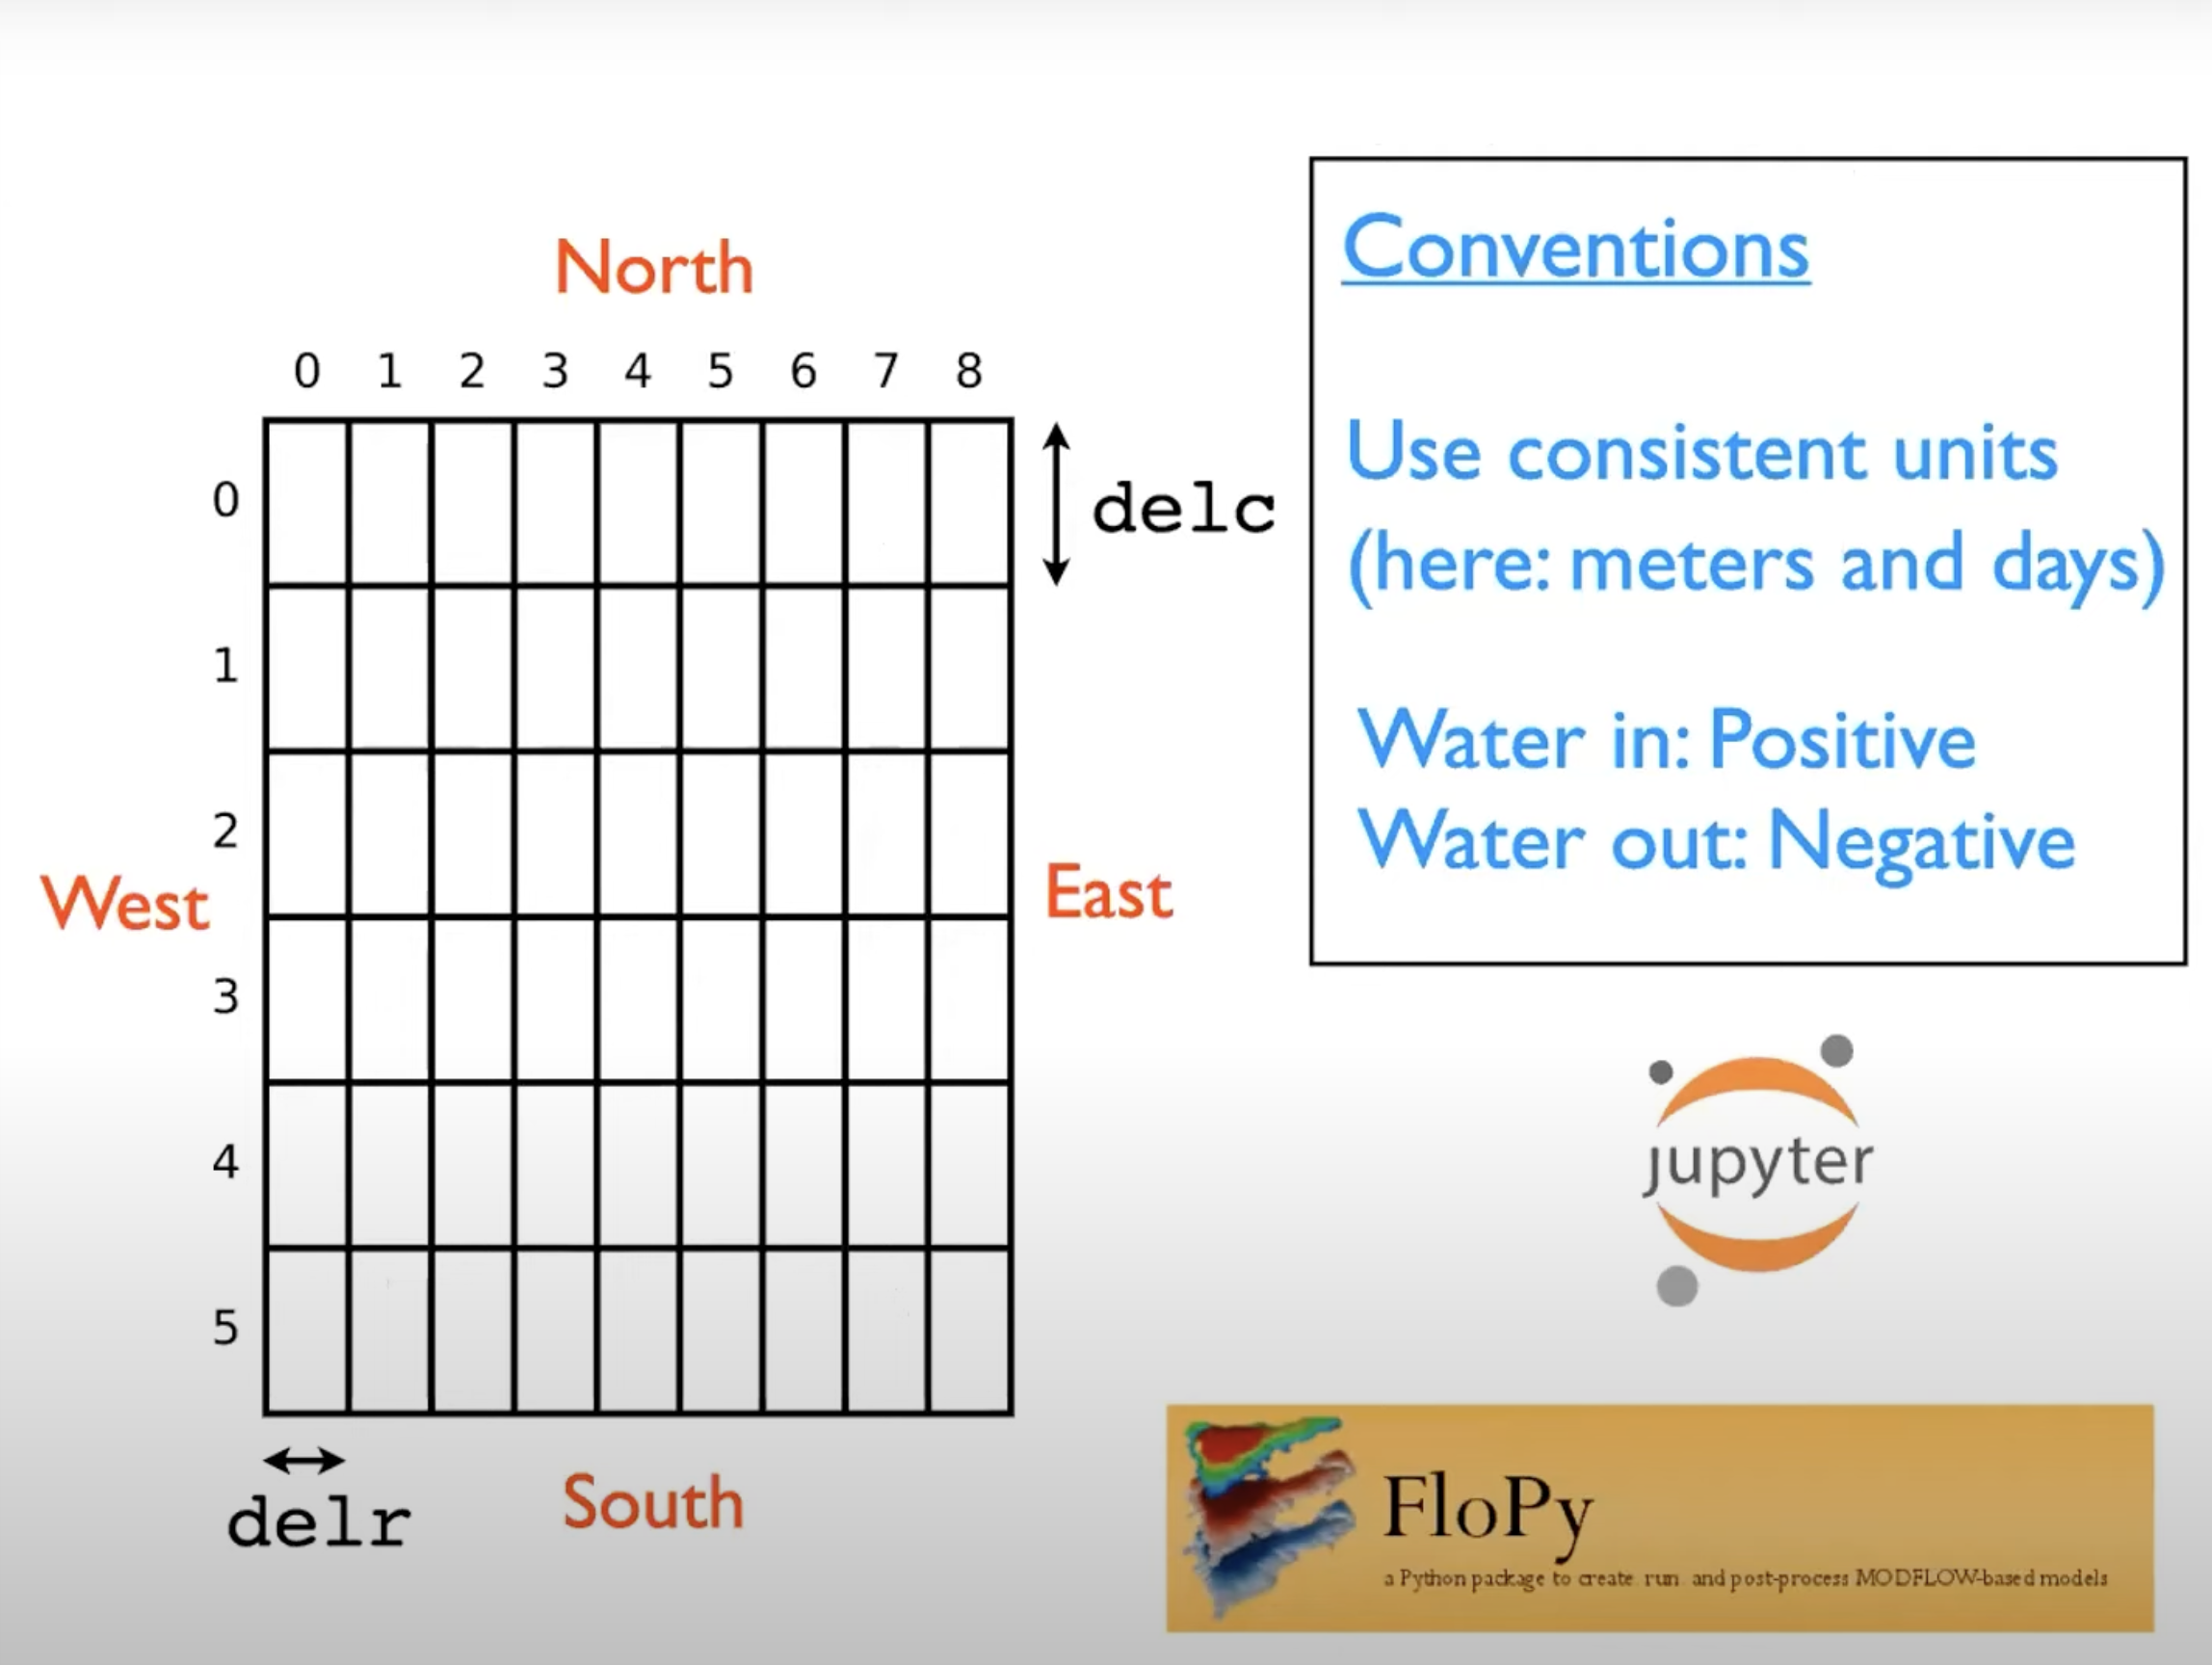

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy as fp

In [2]:
modelname = 'mf6_BVW'
modelws = '/Users/donalneville/Documents/BVW_MF6'

Model Parameters

In [3]:
# Gird parameters
Lx = 10000 # m, the east - west model domain lenght.
Ly = 5000 # m, the south - north model domain lenght.
ncol = 1000 # being 10,000m divided by 10 metre resolution.
nrow = 500 # being 5,000m divided by 10 metre resolution.
delc = Lx / nrow
delr = Ly / ncol

#Layer names for reference
# topsoil & hardpan, modern fluvial S&G, fluvial glacial reworked glacial silt, historic (gorge) fluvial S&G, 
# weather-to-clay limestone,weathered-intensely-fractured/karstic limestone pumping section & non-pupming, 
# non-weathered fractured limestone.

# Layers
nlay = 8 # being the number of geological layers - to be updated to 500m (model domain depth) divided by 10m resolution
top = 40 # top of layer 1, metres above height datum (msl)
botm =[38,31,-6,-10,-14,-22,-60,-422] # base of topsoil & hardpan 2mBGL, base elevation for modern fluvial S&G 2m + 7m is 9mBGL, base elevation for fluvial glacial reworked glacial silt 2m + 7m + 37m is 46mBGL, base elevation for historic (gorge) fluvial S&G 2m + 7m + 37m + 4m is 50mBGL, base elevation for weather-to-clay limestone 2m + 7m + 37m + 4m + 4m is 54mBGL, base elevation for weathered-intensely-fractured/karstic limestone pumping section 2m + 7m + 37m + 4m + 4m + 8m is 62mBGL, base elevation for weathered-intensely-fractured/karstic limestone 2m + 7m + 37m + 4m + 4m + 8m + 38m is 100mBGL, base elevation for non-weathered fractured limestone 2m + 7m + 37m + 4m + 4m + 8m + 38m + 400m is 500mBGL.

#Aquifer properties
k_hor = [0.864,8.64,0.00864,8.64,0.000864,8.64,8.64,0.00864]# m/d hydraulic conductivity
k_ver = [0.864,8.64,0.00864,8.64,0.000864,8.64,8.64,0.00864]# m/d hydraulic conductivity
porosity = [0.4,0.3,0.50,0.3,0.20,0.01,0.01,0.001]# unitless

